# Introduction to Machine Learning

Main Steps :
1. Choose a model
2. Choose hyperparameters (during instanciation)
3. arrange data into a features matrix and a target vector
4. fit the model on the data

In [2]:
%matplotlib inline
import seaborn as sns; sns.set()
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


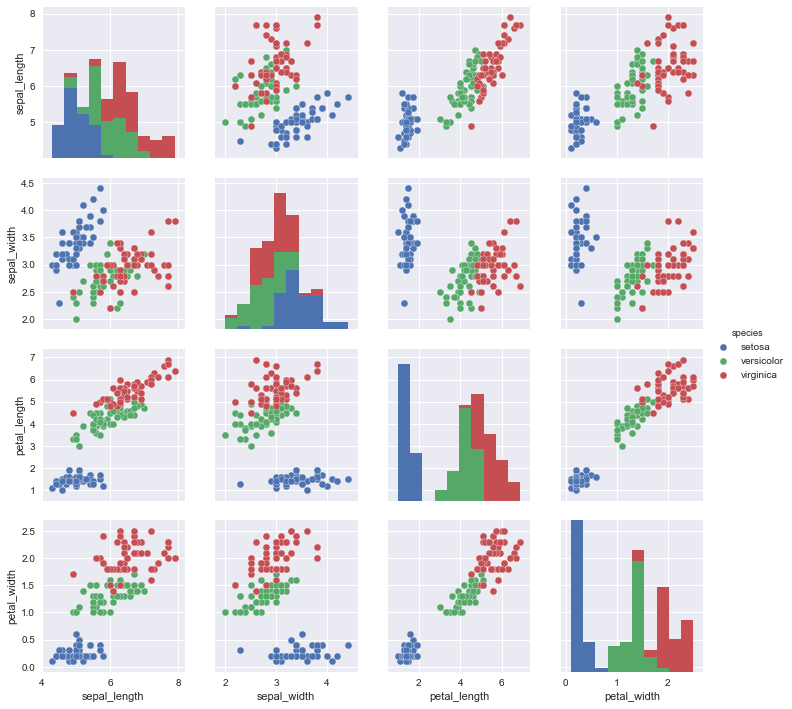

In [3]:
sns.pairplot(iris, hue='species', size=2.5);

In [7]:
from sklearn.model_selection import train_test_split

X_iris = iris.drop('species', axis=1) # drop Labels Series
print("features matrix shape: {}".format(X_iris.shape))
y_iris = iris['species']
print("target array shape: {}".format(y_iris.shape))

Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)
print(Xtrain.shape, Xtest.shape)

features matrix shape: (150, 4)
target array shape: (150,)
(112, 4) (38, 4)


## Supervised learning example: Iris classification

We use Naive Bayes

In [8]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

In [9]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

## Unsupervised learning example: Iris dimensionality

PCA

In [10]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris)         # 4. Transform the data to two dimensions

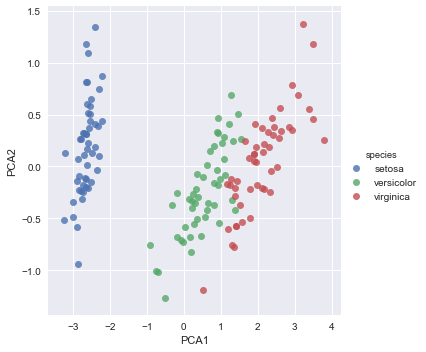

In [11]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);